<a href="https://colab.research.google.com/github/Manisha2297/RestroRecommender/blob/main/New_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#mount your own drive to avoid downloading the data multiple time 

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df_business = pd.read_csv('/content/gdrive/MyDrive/YelpDataset/CsvFiles/yelp_academic_dataset_business.csv')

In [4]:
df_business.head(2)

,Unnamed: 0,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,0,10913 Bailey Rd,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...",f9NumwFMBDn751xgFiRbNA,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",Cornelius,"{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...",1,35.462724,-80.852612,The Range At Lake Norman,28031,36,3.5,NC
1,1,"8880 E Via Linda, Ste 107","{'GoodForKids': 'True', 'ByAppointmentOnly': '...",Yzvjg0SayhoZgCljUJRF9Q,"Health & Medical, Fitness & Instruction, Yoga,...",Scottsdale,NaN,1,33.569404,-111.890264,"Carlos Santo, NMD",85258,4,5.0,AZ


In [5]:
df_business.drop('Unnamed: 0',axis=1,inplace = True)
df_business.categories = df_business.categories.fillna('')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


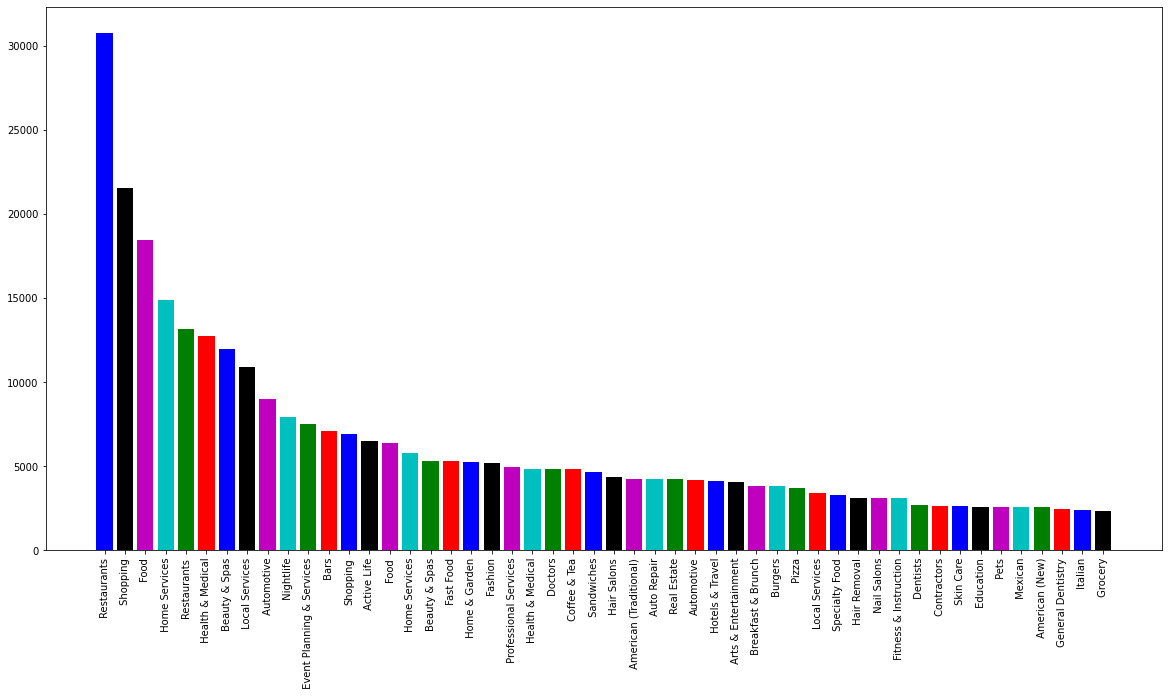

In [6]:
df_open = df_business[df_business.is_open ==1]


Categories = {}

for x in df_open.categories:
   
   all_categories = x.split(',')
   for cat in all_categories:
     if cat not in Categories:
       Categories[cat]=1
     else:
       Categories[cat] +=1

All_categories = list(Categories.keys())    
Cat_list = [[x, Categories[x]] for x in All_categories]

# print(sorted(Cat_list, key = lambda x: x[1], reverse = True))

Cat_list = sorted(Cat_list, key = lambda x: x[1], reverse = True)   

top_50 = Cat_list[:50]

plt.figure(figsize= (20,10))
plt.bar(range(len(top_50)), [x[1] for x in top_50],align = 'center',color ='bkmcgr' )
plt.xticks(range(len(top_50)), [x[0] for x in top_50], rotation = 'vertical')
plt.show();

In [8]:
def get_restaurantdf(resturant_keywords, df,restuarant_df):
  for index, row in df.iterrows():
    if any(key_word in row['categories'] for key_word in resturant_keywords):
      restuarant_df= pd.concat([restuarant_df,row])
  return restuarant_df

In [ ]:
row_size = int(len(restuarant_df)/14)
restuarant_df = pd.DataFrame(restuarant_df.values.reshape((row_size,14)), columns=df_open.columns)

In [ ]:
restuarant_df.head()

In [ ]:
resturant_keywords= ['Restaurants','Food','Fast Food', 'Sandwiches','Burgers', 'Pizza', 'Breakfast & Brunch', 'Speciality Food', 'Mexican','Italian']
restuarant_df = get_restaurantdf(resturant_keywords, df_open,pd.DataFrame())
